In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
with open('metrics_victor.pkl', 'rb') as f:
    metrics = pickle.load(f)

In [3]:
from datetime import timedelta
def f(ttdf):    
    ret = {'recall': [], 
           'precision': [], 
           'fpr': [], 
           'anticipation': [],
           'accuracy': [],
           'f1': []
          }
    dts = []
    tp_m = ttdf["detection"] & ttdf["label"]
    tp = (tp_m).sum()
    fp_m = ttdf["detection"] & ~ttdf["label"]
    fp = (fp_m).sum()
    tn_m = ~ttdf["detection"] & ~ttdf["label"]
    tn = (tn_m).sum()
    fn_m = ~ttdf["detection"] & ttdf["label"]
    fn = (fn_m).sum()
    
    recall = tp/(tp+fn)
    ret['recall'].append(recall)
    precision = tp/(tp+fp) if (tp+fp) else np.nan
    ret['precision'].append(precision) # to avoid print divide by 0 error
    
    ret['fpr'].append(fp/(fp+tn))
    
    #Accuracy = (TP+TN)/(TP+FP+FN+TN)
    ret['accuracy'].append((tp+tn)/(tp+tn+fp+fn))
    ret['anticipation'].append(ttdf[tp_m]['anticipation'].abs().mean())
    ret['f1'].append(2*(precision*recall)/(precision+recall))
    dts.append(0)
    for dt in [1, 2, 3, 4]:
        start_ts = (ttdf['ts_interact']-timedelta(seconds=dt)) # note NaT-val=NaT
        tp = (tp_m & (ttdf['ts_detection']<=start_ts)).sum() # note NaT compared to something, even NaT is False
        fp = fp_m.sum()
        tn = tn_m.sum()
        fn = (fn_m | (tp_m & (ttdf['ts_detection']>start_ts))).sum()
        
        assert len(ttdf)-tp-fp-tn == fn
        
        recall = tp/(tp+fn)
        ret['recall'].append(recall)
        precision = tp/(tp+fp) if (tp+fp) else np.nan
        ret['precision'].append(precision) # to avoid print divide by 0 error     
        ret['fpr'].append(fp/(fp+tn))
        ret['accuracy'].append((tp+tn)/(tp+tn+fp+fn))
        ret['f1'].append(2*(precision*recall)/(precision+recall))
        delay_mask = tp_m & (ttdf['ts_detection']<=start_ts)
        delay = (ttdf[delay_mask]['ts_detection']-ttdf[delay_mask]['ts_interact']).abs().mean().total_seconds()
        ret['anticipation'].append(delay)
        dts.append(dt)
    
    ret = pd.DataFrame(ret, index=dts)
    ret.index.name = "dt"
    return ret

tab = metrics.groupby(["th"]).apply(f)


In [9]:
tab.reset_index(0)[-60:]

,th,recall,precision,fpr,anticipation,accuracy,f1
dt,,,,,,,
0,0.887755,1.000000,0.903226,0.100000,3.248982,0.948276,0.949153
1,0.887755,0.964286,0.900000,0.100000,3.342157,0.931034,0.931034
2,0.887755,0.642857,0.857143,0.100000,4.213068,0.775862,0.734694
3,0.887755,0.392857,0.785714,0.100000,5.402481,0.655172,0.523810
4,0.887755,0.214286,0.666667,0.100000,7.047816,0.568966,0.324324
0,0.897959,1.000000,0.903226,0.100000,3.172797,0.948276,0.949153
1,0.897959,0.964286,0.900000,0.100000,3.268083,0.931034,0.931034
2,0.897959,0.642857,0.857143,0.100000,4.142653,0.775862,0.734694
3,0.897959,0.392857,0.785714,0.100000,5.323642,0.655172,0.523810


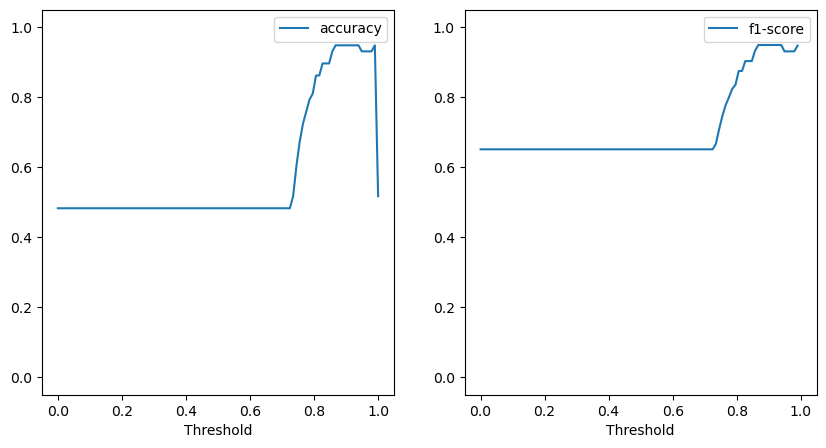

In [12]:
import matplotlib.pyplot as plt

dt=0
to_plot = tab.reset_index(0)
fig,axes= plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(to_plot.xs(dt).th, to_plot.xs(dt).accuracy, label='accuracy')
axes[0].set(xlabel='Threshold', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
axes[0].legend()

axes[1].plot(to_plot.xs(dt).th, to_plot.xs(dt).f1, label='f1-score')
axes[1].set(xlabel='Threshold', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
axes[1].legend()
plt.show()

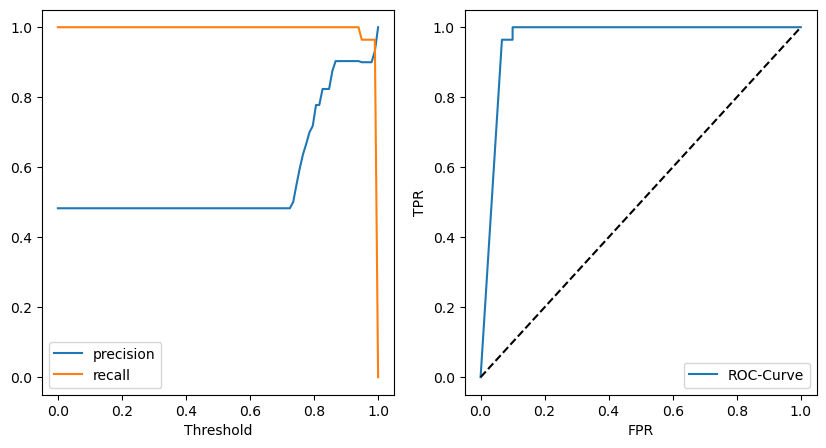

In [15]:
dt=0
to_plot = tab.reset_index(0)
fig,axes= plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(to_plot.xs(dt).th, to_plot.xs(dt).precision.fillna(1), label='precision')
axes[0].plot(to_plot.xs(dt).th, to_plot.xs(dt).recall, label='recall')
axes[0].set(xlabel='Threshold', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
axes[0].set(xlabel='Threshold', xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
axes[0].legend()
axes[1].plot('fpr', 'recall', data=to_plot.xs(dt), label=f"ROC-Curve")
axes[1].set(xlabel="FPR", ylabel="TPR", xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].legend()
plt.show()

In [16]:
# AUROC
np.trapz(to_plot.xs((dt)).recall, to_plot.xs((dt)).th)

0.993075801749271